In [2]:
r"""
Inputs
------
- capacityfactors
- areas

Outputs
-------

Description
-----------
Plot potentials
"""
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import calliope_plot.plot as caplt

In [5]:
import plotnine as pn


def melt_data(data):
    r"""
    Melt data to be able to plot it with plotnine.

    Input
    -----
    data : pandas.DataFrame
        Data to be melted.

    Returns
    -------
    melted : pandas.DataFrame
        Melted data.

    Examples
    --------

    Melts a DataFrame with a timeindex and multiple columns

        timeindex  |  column_1  |  ...
        ----------------------------
        2023-08-31 |    0.1     |  ...
        ...

    to a DataFrame with index 'id' and columns 'timeindex', 'var_name' and 'var_value':

        id | timeindex  | var_name | var_value
        ----------------------------
        0  | 2023-08-31 | column_1  | 0.1
        ...
    """
    melted = data.reset_index()
    melted = pd.melt(melted, id_vars=data.index.name, value_vars=data.columns, var_name="var_name", value_name="var_value")
    melted.index.name = "id"

    return melted


def sort_timeseries(data, ascending=True):
    r"""
    Sorts each of the columns of a DataFrame separately.
    Drops index and resets it to a range from 0 to len(data).

        index |  column_1  |  ...
        ----------------------------
        0     |  0.1       |   ...
        ...
    """
    sorted_data = data.reset_index(drop=True)
    sorted_data.index.name = "id"

    for column in data.columns:
        sorted_data[column] = sorted_data[column].sort_values(ascending=ascending).values

    return sorted_data

def aggregate_timeseries(data, by, values, method="sum"):
    r"""
    Aggregates data by summing over `by`.
    """


In [13]:
capfac = xr.load_dataset("../build/capacity_factors/capacity_factors_offshore_deep_awe.nc")
capfac

# chunk it into years and save it as csv
years = list(set(capfac.time.dt.year.values))
for year in years:
    capfac_year = capfac.sel(time=str(year))
    df_capfac_year = capfac_year.to_dataframe()["__xarray_dataarray_variable__"].unstack("dim_0")
    df_capfac_year.to_csv(f"../build/capacity_factors/capacity_factors_awe_{year}_new.csv")

In [164]:
capacity_factors = xr.load_dataset("../build/capacity_factors/capacity_factors_offshore_deep_awe.nc")
df_capacity_factors = capacity_factors.to_dataframe()["__xarray_dataarray_variable__"].unstack("dim_0")
df_capacity_factors["year"] = df_capacity_factors.index.year
df_capacity_factors["day-time"] = df_capacity_factors.index.strftime('%m %d %H')
df_capacity_factors.set_index(["year", "day-time"], inplace=True)
df_capacity_factors

dim_0                0         1         2         3         4    5    6   \
year day-time                                                               
2013 01 01 00  0.489407  0.995567  0.220752  0.938065  0.761444  0.0  0.0   
     01 01 01  0.508882  0.998839  0.223447  0.994917  0.779830  0.0  0.0   
     01 01 02  0.514570  0.999645  0.229657  1.000000  0.823611  0.0  0.0   
     01 01 03  0.481502  0.999451  0.234205  1.000000  0.882046  0.0  0.0   
     01 01 04  0.444438  0.999621  0.246633  0.998891  0.933059  0.0  0.0   
...                 ...       ...       ...       ...       ...  ...  ...   
2018 12 31 19  0.318471  0.432095  0.676748  0.601654  0.344159  0.0  0.0   
     12 31 20  0.321258  0.383020  0.700779  0.584433  0.791046  0.0  0.0   
     12 31 21  0.323352  0.339008  0.723905  0.547426  0.999741  0.0  0.0   
     12 31 22  0.371029  0.289255  0.840440  0.456308  0.984427  0.0  0.0   
     12 31 23  0.336360  0.232236  0.835814  0.396859  0.956061  0.0  0.0   

dim_0           7         8         9   ...        21        22   23   24  \
year day-time                           ...                                 
2013 01 01 00  0.0  0.045518  0.000000  ...  1.000000  1.000000  0.0  0.0   
     01 01 01  0.0  0.041313  0.000000  ...  1.000000  1.000000  0.0  0.0   
     01 01 02  0.0  0.039824  0.000000  ...  1.000000  1.000000  0.0  0.0   
     01 01 03  0.0  0.040105  0.000000  ...  1.000000  1.000000  0.0  0.0   
     01 01 04  0.0  0.042224  0.000000  ...  1.000000  1.000000  0.0  0.0   
...            ...       ...       ...  ...       ...       ...  ...  ...   
2018 12 31 19  0.0  0.553374  0.001192  ...  0.981947  1.000000  0.0  0.0   
     12 31 20  0.0  0.562326  0.005803  ...  1.000000  1.000000  0.0  0.0   
     12 31 21  0.0  0.574311  0.014087  ...  1.000000  1.000000  0.0  0.0   
     12 31 22  0.0  0.591985  0.039237  ...  1.000000  0.017954  0.0  0.0   
     12 31 23  0.0  0.647925  0.051479  ...  1.000000  0.000000  0.0  0.0   

dim_0                25        26   27        28        29        30  
year day-time                                                         
2013 01 01 00  0.978272  0.978075  1.0  0.008167  0.685905  0.885309  
     01 01 01  0.959878  0.977981  1.0  0.006230  0.693832  0.887238  
     01 01 02  0.959093  0.980666  1.0  0.002944  0.707190  0.875371  
     01 01 03  0.953056  0.976069  1.0  0.002670  0.710694  0.853130  
     01 01 04  1.000000  0.979729  1.0  0.002697  0.710086  0.833008  
...                 ...       ...  ...       ...       ...       ...  
2018 12 31 19  1.000000  1.000000  1.0  0.534397  0.307105  0.533755  
     12 31 20  1.000000  0.993459  1.0  0.505297  0.296951  0.525923  
     12 31 21  1.000000  0.868657  1.0  0.522506  0.287747  0.523885  
     12 31 22  0.931610  0.754919  1.0  0.480969  0.278296  0.519772  
     12 31 23  0.289079  0.538453  1.0  0.560874  0.261948  0.509157  

[52584 rows x 31 columns]

In [165]:
df_capacity_factors
df = df_capacity_factors.reset_index()
df = pd.pivot_table(df, index=df["day-time"], columns="year", values=df.columns)
df = sort_timeseries(df)
df

dim_0        0                                                           1   \
year       2013      2014      2015      2016      2017      2018      2013   
id                                                                            
0      0.004369  0.003823  0.002011  0.005311  0.005338  0.000649  0.026076   
1      0.004729  0.004533  0.002076  0.005496  0.005924  0.000703  0.027317   
2      0.006096  0.004626  0.002329  0.005819  0.006073  0.000998  0.028602   
3      0.007257  0.005866  0.002423  0.006074  0.008016  0.001095  0.031481   
4      0.007413  0.006215  0.002495  0.006216  0.008388  0.001454  0.032750   
...         ...       ...       ...       ...       ...       ...       ...   
8779        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8780        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8781        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8782        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8783        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   

dim_0                                ...        29                      \
year       2014      2015      2016  ...      2015      2016      2017   
id                                   ...                                 
0      0.004223  0.023875  0.009431  ...  0.017343  0.001098  0.008778   
1      0.004474  0.025138  0.010283  ...  0.018011  0.001341  0.010755   
2      0.004812  0.025713  0.010555  ...  0.018419  0.001705  0.012411   
3      0.011051  0.027364  0.010648  ...  0.018681  0.002326  0.012893   
4      0.011482  0.028256  0.010933  ...  0.020883  0.003312  0.013891   
...         ...       ...       ...  ...       ...       ...       ...   
8779        NaN       NaN  1.000000  ...       NaN  0.994297       NaN   
8780        NaN       NaN  1.000000  ...       NaN  0.994546       NaN   
8781        NaN       NaN  1.000000  ...       NaN  0.995521       NaN   
8782        NaN       NaN  1.000000  ...       NaN  0.996080       NaN   
8783        NaN       NaN  1.000000  ...       NaN  0.998317       NaN   

dim_0                  30                                                    
year       2018      2013      2014      2015      2016      2017      2018  
id                                                                           
0      0.004785  0.027485  0.033483  0.049435  0.019469  0.040990  0.033061  
1      0.008325  0.029549  0.034093  0.050979  0.022268  0.041488  0.033628  
2      0.008642  0.029860  0.034950  0.051411  0.024691  0.042698  0.034855  
3      0.008950  0.030082  0.034983  0.051458  0.028628  0.043061  0.038498  
4      0.009518  0.030142  0.035278  0.052018  0.028670  0.046320  0.038808  
...         ...       ...       ...       ...       ...       ...       ...  
8779        NaN       NaN       NaN       NaN  0.997752       NaN       NaN  
8780        NaN       NaN       NaN       NaN  0.997770       NaN       NaN  
8781        NaN       NaN       NaN       NaN  0.997939       NaN       NaN  
8782        NaN       NaN       NaN       NaN  0.998465       NaN       NaN  
8783        NaN       NaN       NaN       NaN  0.999436       NaN       NaN  

[8784 rows x 186 columns]

In [166]:
data = df_capacity_factors.copy()
melted = data.reset_index()
melted = pd.melt(melted, id_vars=data.index.names, value_vars=data.columns, var_name="var_name", value_name="var_value")
melted.set_index(["year", "day-time", "var_name"], inplace=True)
melted

var_value
year day-time var_name           
2013 01 01 00 0          0.489407
     01 01 01 0          0.508882
     01 01 02 0          0.514570
     01 01 03 0          0.481502
     01 01 04 0          0.444438
...                           ...
2018 12 31 19 30         0.533755
     12 31 20 30         0.525923
     12 31 21 30         0.523885
     12 31 22 30         0.519772
     12 31 23 30         0.509157

[1630104 rows x 1 columns]

In [309]:
df_capacity_factors
df = df_capacity_factors.reset_index()
df = pd.pivot_table(df, index=df["day-time"], columns="year", values=df.columns)
df = sort_timeseries(df)
order = df.groupby("dim_0", axis=1).mean().mean().sort_values().index.values


dim_0        0                                                           1   \
year       2013      2014      2015      2016      2017      2018      2013   
id                                                                            
0      0.004369  0.003823  0.002011  0.005311  0.005338  0.000649  0.026076   
1      0.004729  0.004533  0.002076  0.005496  0.005924  0.000703  0.027317   
2      0.006096  0.004626  0.002329  0.005819  0.006073  0.000998  0.028602   
3      0.007257  0.005866  0.002423  0.006074  0.008016  0.001095  0.031481   
4      0.007413  0.006215  0.002495  0.006216  0.008388  0.001454  0.032750   
...         ...       ...       ...       ...       ...       ...       ...   
8779        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8780        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8781        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8782        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   
8783        NaN       NaN       NaN  1.000000       NaN       NaN       NaN   

dim_0                                ...        29                      \
year       2014      2015      2016  ...      2015      2016      2017   
id                                   ...                                 
0      0.004223  0.023875  0.009431  ...  0.017343  0.001098  0.008778   
1      0.004474  0.025138  0.010283  ...  0.018011  0.001341  0.010755   
2      0.004812  0.025713  0.010555  ...  0.018419  0.001705  0.012411   
3      0.011051  0.027364  0.010648  ...  0.018681  0.002326  0.012893   
4      0.011482  0.028256  0.010933  ...  0.020883  0.003312  0.013891   
...         ...       ...       ...  ...       ...       ...       ...   
8779        NaN       NaN  1.000000  ...       NaN  0.994297       NaN   
8780        NaN       NaN  1.000000  ...       NaN  0.994546       NaN   
8781        NaN       NaN  1.000000  ...       NaN  0.995521       NaN   
8782        NaN       NaN  1.000000  ...       NaN  0.996080       NaN   
8783        NaN       NaN  1.000000  ...       NaN  0.998317       NaN   

dim_0                  30                                                    
year       2018      2013      2014      2015      2016      2017      2018  
id                                                                           
0      0.004785  0.027485  0.033483  0.049435  0.019469  0.040990  0.033061  
1      0.008325  0.029549  0.034093  0.050979  0.022268  0.041488  0.033628  
2      0.008642  0.029860  0.034950  0.051411  0.024691  0.042698  0.034855  
3      0.008950  0.030082  0.034983  0.051458  0.028628  0.043061  0.038498  
4      0.009518  0.030142  0.035278  0.052018  0.028670  0.046320  0.038808  
...         ...       ...       ...       ...       ...       ...       ...  
8779        NaN       NaN       NaN       NaN  0.997752       NaN       NaN  
8780        NaN       NaN       NaN       NaN  0.997770       NaN       NaN  
8781        NaN       NaN       NaN       NaN  0.997939       NaN       NaN  
8782        NaN       NaN       NaN       NaN  0.998465       NaN       NaN  
8783        NaN       NaN       NaN       NaN  0.999436       NaN       NaN  

[8784 rows x 186 columns]

In [306]:
data = df
melted = df.copy()
melted = pd.DataFrame(melted.stack(["year", "dim_0"]), columns=["var_value"])
# melted = melted.reindex(order, level="dim_0")
# melted = pd.melt(melted, id_vars=data.index.names, value_vars=data.columns.to_list(), var_name="var_name", value_name="var_value")
# melted.set_index(["year", "day-time", "var_name"], inplace=True)
melted.index.names = ["sorted_hours", "year", "region"]
melted = melted.reset_index()
melted["region"] = pd.Categorical(melted["region"], ordered=True, categories=order)
melted

,sorted_hours,year,region,var_value
0,0,2013,0,0.004369
1,0,2013,1,0.026076
2,0,2013,2,0.003020
3,0,2013,3,0.000000
4,0,2013,4,0.000000
...,...,...,...,...
1630099,8783,2016,26,1.000000
1630100,8783,2016,27,1.000000
1630101,8783,2016,28,1.000000
1630102,8783,2016,29,0.998317


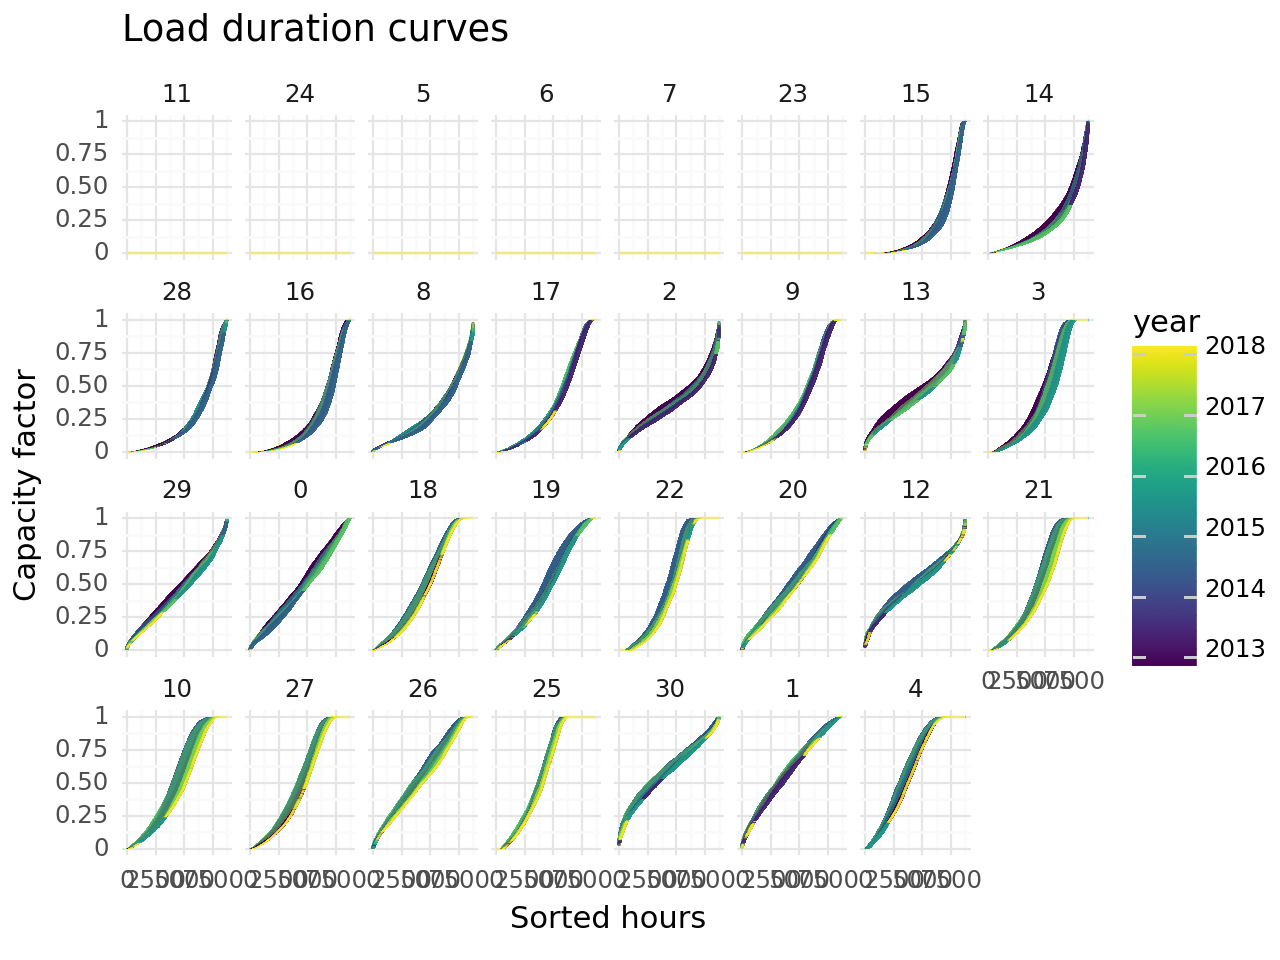

<Figure Size: (640 x 480)>

In [308]:
(
    pn.ggplot(melted, pn.aes(x="sorted_hours", y="var_value", color="year", group="region"))
    + pn.geom_line(alpha=0.5)
    + pn.facet_wrap("region", nrow=4, ncol=8)
    + pn.theme_minimal()
    + pn.labs(x="Sorted hours", y="Capacity factor", title="Load duration curves")
)

In [9]:
import numpy as np
import xarray as xr
import geopandas as gpd
capacity_factors = xr.load_dataset("../build/capacity_factors/capacity_factors_offshore_deep_awe.nc")
boundaries = gpd.read_file("../build/shapes/eez.geojson")


In [246]:

regions = boundaries[["geoname", "iso_sov1", "iso_sov2"]]

df = capacity_factors.groupby("time.year").mean("time").to_dataframe()["__xarray_dataarray_variable__"].unstack("year")

df = df.assign(mean=df.mean(axis=1)).sort_values('mean').drop('mean', axis=1)
ticks = regions.loc[df.index]
df.index = df.index.map(str)

def format_tuple(tupl):
    relevant_entries = [item for item in list(tupl) if isinstance(item, str)]
    result = "/".join(relevant_entries)
    return result

ticks = [format_tuple(row) for _, row in ticks[["iso_sov1", "iso_sov2"]].iterrows()]

/tmp/ipykernel_2801443/1317616384.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator


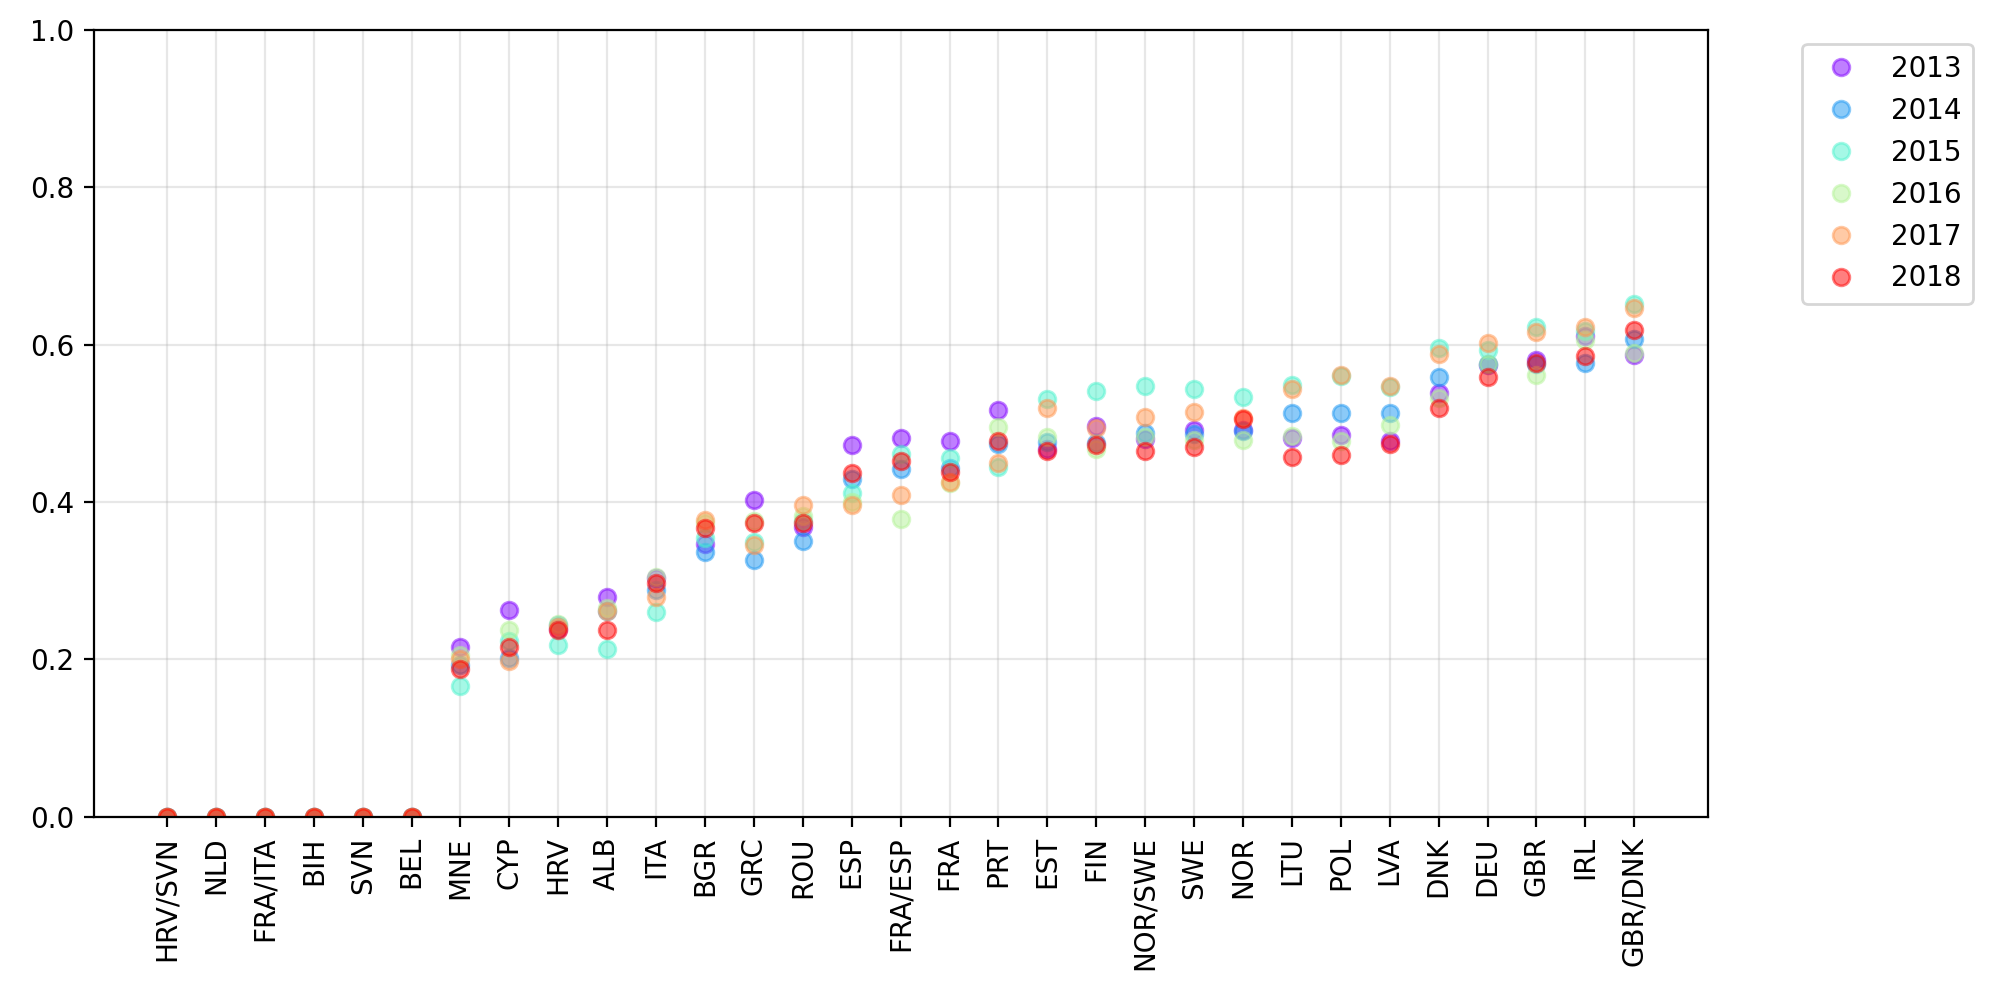

In [275]:
fig, ax = plt.subplots(figsize=(10, 5))
cmap = plt.get_cmap('rainbow', len(df.columns))
for n, col in enumerate(df.columns):
    ax.plot(df[col], label=col, linestyle="none", marker="o", alpha=0.5, color=cmap(n))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ticks, rotation=90)
plt.tight_layout()
plt.grid(alpha=0.3)
plt.ylim(0, 1)
plt.show()

In [10]:
capacity_factors

<xarray.Dataset>
Dimensions:                        (time: 52584, id: 31)
Coordinates:
  * time                           (time) datetime64[ns] 2013-01-01 ... 2018-...
  * id                             (id) object '3' '6' '15' ... '276' '280'
Data variables:
    __xarray_dataarray_variable__  (time, id) float64 0.4894 0.9956 ... 0.5092

In [9]:
import pandas as pd
capfac_existing = pd.read_csv("../run-prebuilt-sector-coupled-euro-calliope/build/pre-built/model/eurospores/capacityfactors-wind-offshore.csv", index_col=0)

In [10]:
capfac_existing.columns.name = "id"
capfac_existing.index.name = "time"
capfac_existing = capfac_existing.stack("id")
capfac_existing.name = "__xarray_dataarray_variable__"
cf = capfac_existing.to_xarray()
cf = cf.to_dataset()

<xarray.Dataset>
Dimensions:                        (timestep: 78888, id: 98)
Coordinates:
  * timestep                       (timestep) object '2010-01-01 00:00:00' .....
  * id                             (id) object 'ALB_1' 'AUT_1' ... 'SWE_4'
Data variables:
    __xarray_dataarray_variable__  (timestep, id) float64 0.7965 0.0 ... 0.847

In [11]:
import xarray as xr
contry = xr.load_dataset("../build/capacity_factors/capacity_factors_onshore_awe.nc")

In [15]:
contry.id

<xarray.DataArray 'id' (id: 98)>
array(['ALB_1', 'AUT_1', 'AUT_2', 'AUT_3', 'BEL_1', 'BGR_1', 'BIH_1', 'CHE_1',
       'CHE_2', 'CYP_1', 'CZE_1', 'CZE_2', 'DEU_1', 'DEU_2', 'DEU_3', 'DEU_4',
       'DEU_5', 'DEU_6', 'DEU_7', 'DNK_1', 'DNK_2', 'ESP_1', 'ESP_10',
       'ESP_11', 'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8',
       'ESP_9', 'EST_1', 'FIN_1', 'FIN_2', 'FRA_1', 'FRA_10', 'FRA_11',
       'FRA_12', 'FRA_13', 'FRA_14', 'FRA_15', 'FRA_2', 'FRA_3', 'FRA_4',
       'FRA_5', 'FRA_6', 'FRA_7', 'FRA_8', 'FRA_9', 'GBR_1', 'GBR_2', 'GBR_3',
       'GBR_4', 'GBR_5', 'GBR_6', 'GRC_1', 'GRC_2', 'HRV_1', 'HUN_1', 'IRL_1',
       'ISL_1', 'ITA_1', 'ITA_2', 'ITA_3', 'ITA_4', 'ITA_5', 'ITA_6', 'LTU_1',
       'LUX_1', 'LVA_1', 'MKD_1', 'MNE_1', 'NLD_1', 'NOR_1', 'NOR_2', 'NOR_3',
       'NOR_4', 'NOR_5', 'NOR_6', 'NOR_7', 'POL_1', 'POL_2', 'POL_3', 'POL_4',
       'POL_5', 'PRT_1', 'PRT_2', 'ROU_1', 'ROU_2', 'ROU_3', 'SRB_1', 'SVK_1',
       'SVN_1', 'SWE_1', 'SWE_2', 'SWE_3', 'SWE_4'], dtype=object)
Coordinates:
  * id       (id) object 'ALB_1' 'AUT_1' 'AUT_2' ... 'SWE_2' 'SWE_3' 'SWE_4'

In [16]:
df.id

<xarray.DataArray 'id' (id: 98)>
array(['ALB_1', 'AUT_1', 'AUT_2', 'AUT_3', 'BEL_1', 'BGR_1', 'BIH_1', 'CHE_1',
       'CHE_2', 'CYP_1', 'CZE_1', 'CZE_2', 'DEU_1', 'DEU_2', 'DEU_3', 'DEU_4',
       'DEU_5', 'DEU_6', 'DEU_7', 'DNK_1', 'DNK_2', 'ESP_1', 'ESP_10',
       'ESP_11', 'ESP_2', 'ESP_3', 'ESP_4', 'ESP_5', 'ESP_6', 'ESP_7', 'ESP_8',
       'ESP_9', 'EST_1', 'FIN_1', 'FIN_2', 'FRA_1', 'FRA_10', 'FRA_11',
       'FRA_12', 'FRA_13', 'FRA_14', 'FRA_15', 'FRA_2', 'FRA_3', 'FRA_4',
       'FRA_5', 'FRA_6', 'FRA_7', 'FRA_8', 'FRA_9', 'GBR_1', 'GBR_2', 'GBR_3',
       'GBR_4', 'GBR_5', 'GBR_6', 'GRC_1', 'GRC_2', 'HRV_1', 'HUN_1', 'IRL_1',
       'ISL_1', 'ITA_1', 'ITA_2', 'ITA_3', 'ITA_4', 'ITA_5', 'ITA_6', 'LTU_1',
       'LUX_1', 'LVA_1', 'MKD_1', 'MNE_1', 'NLD_1', 'NOR_1', 'NOR_2', 'NOR_3',
       'NOR_4', 'NOR_5', 'NOR_6', 'NOR_7', 'POL_1', 'POL_2', 'POL_3', 'POL_4',
       'POL_5', 'PRT_1', 'PRT_2', 'ROU_1', 'ROU_2', 'ROU_3', 'SRB_1', 'SVK_1',
       'SVN_1', 'SWE_1', 'SWE_2', 'SWE_3', 'SWE_4'], dtype=object)
Coordinates:
  * id       (id) object 'ALB_1' 'AUT_1' 'AUT_2' ... 'SWE_2' 'SWE_3' 'SWE_4'

In [25]:
role_model = xr.load_dataset("../build/capacity_factors/capacity_factors_offshore_deep_awe.nc")
fan =        xr.load_dataset("../build/capacity_factors/capacity_factors_old_wind-onshore.nc")

In [23]:
fan

<xarray.Dataset>
Dimensions:                        (time: 78888, id: 98)
Coordinates:
  * time                           (time) datetime64[ns] 2010-01-01 ... 2018-...
  * id                             (id) object 'ALB_1' 'AUT_1' ... 'SWE_4'
Data variables:
    __xarray_dataarray_variable__  (time, id) float64 0.5578 0.02894 ... 0.8988

In [26]:
role_model

<xarray.Dataset>
Dimensions:                        (time: 52584, id: 31)
Coordinates:
  * time                           (time) datetime64[ns] 2013-01-01 ... 2018-...
  * id                             (id) object '3' '6' '15' ... '276' '280'
Data variables:
    __xarray_dataarray_variable__  (time, id) float64 0.4894 0.9956 ... 0.5092

In [32]:
import geopandas as gpd
boundaries = gpd.read_file("../data/europe-98-zones.geojson/europe-98-zones.geojson")

In [33]:
boundaries

,id,country_code,name,type,proper,geometry
0,ALB_1,ALB,Albania,country,True,"MULTIPOLYGON (((19.99213 39.77490, 19.99181 39..."
1,AUT_1,AUT,custom_region,custom_region,True,"MULTIPOLYGON (((14.24330 46.70068, 14.25348 46..."
2,AUT_2,AUT,custom_region,custom_region,True,"MULTIPOLYGON (((14.23851 46.70871, 14.23770 46..."
3,AUT_3,AUT,custom_region,custom_region,True,"MULTIPOLYGON (((16.00268 46.84689, 16.00124 46..."
4,BEL_1,BEL,Belgium,country,True,"MULTIPOLYGON (((6.20940 50.51474, 6.21025 50.5..."
...,...,...,...,...,...,...
93,SVN_1,SVN,Slovenia,country,True,"MULTIPOLYGON (((13.59238 45.82336, 13.58854 45..."
94,SWE_1,SWE,custom_region,custom_region,True,"MULTIPOLYGON (((21.60959 65.09620, 21.60888 65..."
95,SWE_2,SWE,custom_region,custom_region,True,"MULTIPOLYGON (((17.32378 60.68683, 17.32388 60..."
96,SWE_3,SWE,custom_region,custom_region,True,"MULTIPOLYGON (((18.16225 57.31538, 18.16365 57..."


In [9]:

import pandas as pd
df = pd.read_csv("../build/overrides/timeseries/capacity_factors_onshore_awe.csv", index_col=0)

In [10]:
df

,ALB_1,AUT_1,AUT_2,AUT_3,BEL_1,BGR_1,BIH_1,CHE_1,CHE_2,CYP_1,...,ROU_1,ROU_2,ROU_3,SRB_1,SVK_1,SVN_1,SWE_1,SWE_2,SWE_3,SWE_4
time,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,0.000000,0.071580,0.088012,0.430049,1.000000,0.001346,0.025313,0.135952,0.078307,0.018502,...,0.003397,0.000542,0.077371,0.010383,0.662939,0.135884,0.315558,0.633744,0.993114,1.0
2013-01-01 01:00:00,0.000000,0.066631,0.091891,0.440325,1.000000,0.000994,0.019538,0.155739,0.072151,0.039262,...,0.005153,0.000647,0.081636,0.024430,0.665875,0.134249,0.348350,0.631441,0.995517,1.0
2013-01-01 02:00:00,0.000002,0.048263,0.091990,0.447705,1.000000,0.000704,0.013804,0.183601,0.058134,0.070576,...,0.008691,0.001421,0.109719,0.048540,0.663962,0.135611,0.366219,0.649402,0.995441,1.0
2013-01-01 03:00:00,0.000002,0.039681,0.090212,0.456084,1.000000,0.000610,0.007747,0.201007,0.051695,0.102316,...,0.016109,0.003224,0.138695,0.079285,0.660725,0.153106,0.389329,0.654476,0.994629,1.0
2013-01-01 04:00:00,0.000002,0.040621,0.072682,0.443483,1.000000,0.000428,0.005128,0.211936,0.046682,0.133011,...,0.025155,0.006078,0.167597,0.130968,0.659740,0.185821,0.421278,0.661901,0.996331,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,0.333715,0.076535,0.290698,0.521066,0.192721,0.031964,0.555939,0.022143,0.060372,0.115147,...,0.204028,0.009393,0.001080,0.204771,0.574357,0.287822,0.468185,0.999825,1.000000,1.0
2018-12-31 20:00:00,0.352146,0.073922,0.265333,0.447985,0.236089,0.046998,0.561771,0.025377,0.056903,0.180630,...,0.228050,0.009521,0.003627,0.224317,0.458924,0.340649,0.439544,0.999812,1.000000,1.0
2018-12-31 21:00:00,0.374282,0.069905,0.235365,0.362713,0.284755,0.064790,0.518366,0.022061,0.049048,0.257182,...,0.219016,0.008892,0.007044,0.234265,0.314421,0.392628,0.439880,0.995956,0.999998,1.0
